*CH.SC.U4CSE23223*

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.96      0.80       118
           1       0.69      0.18      0.28        62

    accuracy                           0.69       180
   macro avg       0.69      0.57      0.54       180
weighted avg       0.69      0.69      0.62       180

Confusion Matrix:
 [[113   5]
 [ 51  11]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


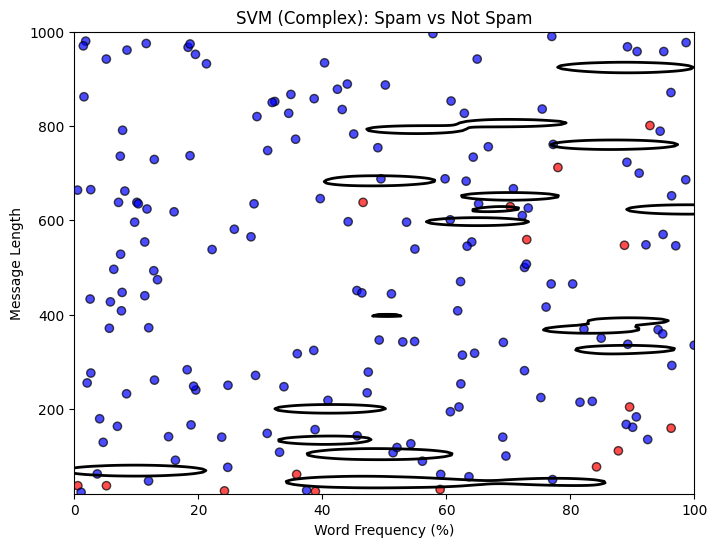

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

np.random.seed(42)
n = 600

word_freq = np.random.rand(n) * 100
msg_length = np.random.randint(23, 1000, n)
punct_count = np.random.randint(0, 75, n)
upper_ratio = np.random.rand(n)
num_links = np.random.randint(0, 10, n)

labels = np.where(
    (word_freq > 40) & (num_links > 2) & (upper_ratio > 0.3) | (msg_length < 100),
    1, 0
)

df = pd.DataFrame({
    "word_freq": word_freq,
    "msg_length": msg_length,
    "punct_count": punct_count,
    "upper_ratio": upper_ratio,
    "num_links": num_links,
    "spam": labels
})

X = df[["word_freq", "msg_length", "punct_count", "upper_ratio", "num_links"]]
y = df["spam"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = SVC(kernel="rbf", C=5, gamma=0.01, probability=True)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(8,6))
plt.scatter(X_test["word_freq"], X_test["msg_length"], c=y_pred, cmap="bwr", edgecolors="k", alpha=0.7)

xx, yy = np.meshgrid(np.linspace(0,100,300), np.linspace(20,1000,300))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel(),
                                np.zeros(300*300), np.zeros(300*300), np.zeros(300*300)])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")
plt.xlabel("Word Frequency (%)")
plt.ylabel("Message Length")
plt.title("SVM (Complex): Spam vs Not Spam")
plt.show()